## Load MNIST on Python 3.x

In [1]:
import pickle
import gzip
import numpy as np

In [2]:
filename = 'mnist.pkl.gz'
f1 = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f1, encoding='latin1')
f1.close()

f2 = gzip.open(filename, 'rb')
data = pickle.load(f2, encoding='latin1')
f2.close()

train_X = np.array(training_data[0])
train_t = np.array(training_data[1])
val_X = np.array(validation_data[0])
val_t = np.array(validation_data[1])
test_X = np.array(test_data[0])
test_t = np.array(test_data[1])
train_data = []
training_t = []
val_data = []
val_t = []
testing_data = []
testing_t = []
train_data = train_X
training_t = train_t
val_data = val_X
val_t = val_t
testing_data = test_X
testing_t = test_t

# print (tr_target)
# print(train_data)
# print(training_t)
# print (train_data.shape)
# print (training_t.shape)
#print (len(data))
# print (validation_data.shape)
# print (test_data.shape)

3


## Load USPS on Python 3.x

In [3]:
from PIL import Image
import os
import numpy as np

In [4]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
            
head, *tail = USPSTar
print(head)
# print(USPSMat[1])
# print(USPSTar[138])


0


In [7]:
USPSTest = np.array(USPSMat)
USPSTar = np.array(USPSTar)

In [5]:
# Neural Network
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_mldata
import numpy as np
from sklearn import datasets, svm, metrics

Using TensorFlow backend.


In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes=10
image_vector_size=28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
image_size = 784 
model = Sequential()
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=10,
verbose=False,validation_split=.1)
loss,accuracy = model.evaluate(x_test, y_test, verbose=False) 

In [8]:
USPS_x_test = USPSTest.reshape(USPSTest.shape[0], image_vector_size)
USPS_y_test = keras.utils.to_categorical(USPSTar, num_classes)
print (loss)
print (accuracy)

0.38080972957611087
0.9034


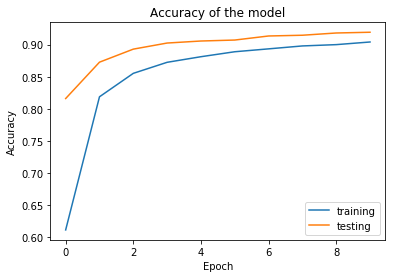

<Figure size 432x288 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy of the model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'testing'], loc='best')
plt.show()
plt.savefig('img.png')

In [12]:
loss1,accuracy1 = model.evaluate(x_test, y_test, verbose=False)
loss1,accuracy2 = model.evaluate(USPS_x_test, USPS_y_test, verbose=False)
print ('Testing  Accuracy: ',accuracy1)
print ('USPS Accuracy: ',accuracy2)

Testing  Accuracy:  0.9034
USPS Accuracy:  0.312165608280414


In [13]:
mnist = fetch_mldata('MNIST original')
train_data = 60000
test_data = 10000
indices = np.arange(len(mnist.data))
train_idx = np.arange(0,train_data)
test_idx = np.arange(train_data + 1 , train_data + test_data)

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
X_train, Y_train = mnist.data[train_idx], mnist.target[train_idx]
X_test, Y_test = mnist.data[test_idx], mnist.target[test_idx]

In [15]:
nn=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(45,90),random_state=1)
nn.fit(X_train,Y_train)

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(45, 90), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
pred=nn.predict(X_test)
print (nn.score(X_test, Y_test))
print (nn.score(X_train, Y_train))
expected = Y_test
predicted = pred

cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))


0.9522952295229523
0.9748166666666667
Confusion matrix:
[[ 957    0    3    1    0    6    4    5    3    0]
 [   0 1120    1    4    0    2    3    1    4    0]
 [   9    2  989    7    4    1    6    6    6    2]
 [   1    0   15  962    1   17    0    8    2    4]
 [   4    1    5    1  930    1   10    2    3   25]
 [   6    2    3   31    5  824    5    1    9    6]
 [  12    2    4    0    3    7  923    1    6    0]
 [   3    4   19    9    2    2    0  975    0   14]
 [   5    5    8   12    6   13    8    6  904    7]
 [   5    3    2   11   25    7    2   12    4  938]]
Accuracy=0.9522952295229523


In [18]:
pred1=nn.predict(USPSTest)
print (nn.score(USPSTest, USPSTar))
#print (nn.score(X_train, Y_train))
expected1 = USPSTar
predicted1 = pred1

cm = metrics.confusion_matrix(expected1, predicted1)
print("Confusion matrix:\n%s" % cm)
#print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))


0.29816490824541225
Confusion matrix:
[[ 267    0  115  118   43  414   10  967    3   63]
 [   7  118  452  209    4  283    1  917    8    1]
 [  12   11 1283  228    6  315    8  136    0    0]
 [   4    2  140 1340    0  387    0  124    1    2]
 [  18   33   86   55  371  290    8 1082    7   50]
 [  20   13  172  399    4 1220    5  164    1    2]
 [  61    7  903  126   32  483  238  146    0    4]
 [   5   19  107  572    1  222    0 1071    0    3]
 [  19   15  293  341    8  894   20  395   13    2]
 [   4   43   84  428   10  106    0 1266   17   42]]


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.datasets import fetch_mldata
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, svm, metrics

In [20]:
#RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=100)
classifier2.fit(X_train, Y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
s = Y_test
print(s)
count = 0
pred = classifier2.predict(X_test)
print (pred)
for i in range (len(pred)):
    if pred[i] == s[i]:
        count = count + 1
print (count)
print (len(pred))


[0. 0. 0. ... 9. 9. 9.]
[0. 0. 0. ... 9. 9. 9.]
9695
9999


In [23]:
9695/9999.0

0.9695969596959696

In [24]:
#Boosting - Ada Boost

adb = AdaBoostClassifier(RandomForestClassifier(),n_estimators = 5, learning_rate = 1)
adb.fit(X_train,Y_train)

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: F

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1, n_estimators=5, random_state=None)

In [26]:
print (adb.score(X_test,Y_test))
print (adb.score(X_train,Y_train))

0.9572957295729573
0.9999666666666667


In [27]:
expected = Y_test
predicted = pred
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[ 969    0    0    0    0    2    4    1    2    1]
 [   0 1124    1    4    0    1    2    0    2    1]
 [   7    0  999    4    3    0    4    9    6    0]
 [   0    0    9  973    0    8    0    9    8    3]
 [   1    0    2    0  959    0    5    0    2   13]
 [   5    0    0   16    2  854    6    2    5    2]
 [   5    3    0    0    5    3  938    0    4    0]
 [   1    4   20    3    1    0    0  986    2   11]
 [   2    0    6    9    5    7    3    3  932    7]
 [   8    5    2   10   10    2    1    4    6  961]]


In [28]:
pred2=classifier2.predict(USPSTest)
print (classifier2.score(USPSTest, USPSTar))
#print (nn.score(X_train, Y_train))
expected2 = USPSTar
predicted2 = pred2

cm = metrics.confusion_matrix(expected2, predicted2)
print("Confusion matrix:\n%s" % cm)

0.11605580279013951
Confusion matrix:
[[   0   81    1    0   16  196    0 1706    0    0]
 [   0  500    0    1    0   35    0 1464    0    0]
 [   0  305    2    1    4  163    0 1524    0    0]
 [   0   62    1    5    5  285    0 1642    0    0]
 [   0  135    0    0   11   55    0 1799    0    0]
 [   0  220    0    2    2  483    0 1293    0    0]
 [   0  124    0    1    5  361    0 1509    0    0]
 [   0  602    0    0    0   78    0 1320    0    0]
 [   0  195    1    3    5  669    0 1127    0    0]
 [   0  299    0    0    5   89    0 1607    0    0]]


In [ ]:
#SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report 
import seaborn as sns

X_train, y_train = train_X, train_t
X_test, y_test = test_X, test_t
classifier1_svc = SVC(kernel='rbf', C=2, gamma = 0.05);
classifier1_svc.fit(X_train, y_train)
predictedlabel = classifier1_svc.predict(X_test)
accuracy_SVM = accuracy_score(y_test, predictedlabel)
print("Mnist Test accuracy: ", accuracy_SVM)
predictedlabel_usps = classifier1_svc.predict(USPSTest)
accuracy_USPS=accuracy_score(USPSTar, predictedlabel_usps)
print("USPS accuracy: ", accuracy_USPS)

cm1 = metrics.confusion_matrix(y_test, predictedlabel)
print("Confusion matrix:\n%s" % cm1)
cm2 = metrics.confusion_matrix(USPSTar, predictedlabel_usps)
print("Confusion matrix:\n%s" % cm2)
'''
Mnist Test accuracy: 0.9827
USPS accuracy: 0.2614130706535327

Confusion matrix:
[[ 974    0    1    0    0    1    1    1    2    0]
 [   0 1128    3    1    0    1    0    1    1    0]
 [   4    0 1015    1    1    0    0    6    5    0]
 [   0    0    1  997    0    3    0    5    4    0]
 [   0    1    3    0  964    0    4    0    2    8]
 [   2    0    1    7    1  872    3    1    4    1]
 [   5    2    0    0    2    3  945    0    1    0]
 [   0    3    9    1    1    0    0 1004    2    8]
 [   2    0    1    6    1    2    0    2  958    2]
 [   4    4    2    8    7    2    0    6    6  970]]
Confusion matrix:
[[ 226    0 1564    2   26   35    2    0   79   66]
 [  78  257  713  172  262   77   12  337   88    4]
 [   8    0 1944    6    2   20    1    6   11    1]
 [   4    0 1193  725    0   41    0    0   37    0]
 [   6    0 1045   18  522   96    0   56  252    5]
 [  15    0 1305   16    1  626    0    0   37    0]
 [  78    0 1534    2   10   61  290    0   22    3]
 [  17    6 1435  129    6  134    0  220   52    1]
 [   7    0 1387   14    4  221    0    0  367    0]
 [   1    0 1508   79   26   29    0   39  267   51]]
 '''

classifier2_svc = SVC(kernel='linear');
classifier2_svc.fit(X_train, y_train)
predictedlabel = classifier2_svc.predict(X_test)
accuracy_SVM = accuracy_score(y_test, predictedlabel)
print("Mnist Test accuracy: ", accuracy_SVM)
predictedlabel_usps = classifier2_svc.predict(USPSTest)
accuracy_USPS=accuracy_score(USPSTar, predictedlabel_usps)
print("USPS accuracy: ", accuracy_USPS)

cm1 = metrics.confusion_matrix(y_test, predictedlabel)
print("Confusion matrix:\n%s" % cm1)
cm2 = metrics.confusion_matrix(USPSTar, predictedlabel_usps)
print("Confusion matrix:\n%s" % cm2)
'''
 Mnist Test accuracy: 0.9154
 USPS accuracy: 0.2605630281514076
Confusion matrix:
 [[ 958    0    2    1    0    7    8    2    2    0]
 [   0 1113    4    1    0    1    4    1   11    0]
 [  10    9  912   22   11    4   12   10   39    3]
 [   5    2   20  915    3   20    5   12   19    9]
 [   1    3    5    3  914    0   10    3    6   37]
 [  10    3    1   38   11  761   20    8   31    9]
 [   9    4    6    2    6   20  908    1    2    0]
 [   2    9   21    6    6    1    1  945    4   33]
 [   8   13    8   23   13   39    8   15  834   13]
 [   6    8    2   15   35   10    0   26   13  894]]

Confusion matrix:
    
 [[ 313    1  381  311   59  174  115  486   59  101]
 [  44  279  664  159  354   99   29  279   72   21]
 [  70   46 1286  100   47  171  149   83   21   26]
 [  49   38  473  749   17  483   33   80   44   34]
 [  53   54  189  117  594  179   73  550  133   58]
 [  42   24  839  218   23  645   80   94   27    8]
 [  98   12  732  114   55  332  510   79   15   53]
 [ 127   87  231  534  115  150   25  607   85   39]
 [ 175   31  148  658  123  398  113  199  115   40]
 [  40   51  156  550  114   75   16  709  176  113]]
'''   
classifier3_svc = SVC(kernel='rbf');
classifier3_svc.fit(X_train, y_train)
predictedlabel = classifier3_svc.predict(X_test)
accuracy_SVM = accuracy_score(y_test, predictedlabel)
print("Mnist Test accuracy: ", accuracy_SVM)
predictedlabel_usps = classifier3_svc.predict(USPSTest)
accuracy_USPS=accuracy_score(USPSTar, predictedlabel_usps)
print("USPS accuracy: ", accuracy_USPS)

cm1 = metrics.confusion_matrix(y_test, predictedlabel)
print("Confusion matrix:\n%s" % cm1)
cm2 = metrics.confusion_matrix(USPSTar, predictedlabel_usps)
print("Confusion matrix:\n%s" % cm2)
'''
 Mnist Test accuracy: 0.9435 
 USPS accuracy: 0.38541927096354817

Confusion matrix:
[[ 967    0    1    0    0    5    4    1    2    0]
 [   0 1120    2    3    0    1    3    1    5    0]
 [   9    1  962    7   10    1   13   11   16    2]
 [   1    1   14  950    1   17    1   10   11    4]
 [   1    1    7    0  937    0    7    2    2   25]
 [   7    4    5   33    7  808   11    2   10    5]
 [  10    3    4    1    5   10  924    0    1    0]
 [   2   13   22    5    7    1    0  954    4   20]
 [   4    6    6   14    8   24   10    8  891    3]
 [  10    6    0   12   33    5    1   14    6  922]]

Confusion matrix:

[[ 573    2  428   19  285  248   73   44    6  322]
 [ 110  429  285  137  273  180   46  501   22   17]
 [ 128   18 1402   59   39  198   61   57   23   14]
 [  76    3  186 1123   11  483    5   70   27   16]
 [  18   67   91   14 1167  267   22  194   69   91]
 [ 108   17  257  102   25 1367   60   43   15    6]
 [ 197    7  489   24   98  394  748   13    7   23]
 [  50  225  457  265   57  416   15  452   41   22]
 [  73   25  209  193   87 1006   95   41  244   27]
 [  26  166  228  278  213  165    8  499  214  203]]

'''



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.datasets import fetch_mldata
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, svm, metrics


classifier2 = RandomForestClassifier(n_estimators=100)
classifier1 = SVC(kernel='linear')
nn=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(45,90),random_state=1)

evc = VotingClassifier( estimators= [('classifier2',classifier2),('classifier1',classifier1),('nn', nn)], voting = 'hard')

evc.fit(X_train,Y_train)
score=evc.score(X_test, Y_test)
print(score)
score1=evc.score(USPSTest, USPSTar)
print(score1)



# 0.976
# 0.3074536531

In [ ]:


def oneHotIt(Y):
    hotvector=keras.utils.to_categorical(Y,10)
    return hotvector


def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds


def getLoss(w,x,y,lam):
    m = x.shape[0] 
    y_mat = oneHotIt(y) 
    scores = np.dot(x,w)
    prob = softmax(scores) 
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) + (lam/2)*np.sum(w*w) 
    grad = (-1 / m) * np.dot(x.T,(y_mat - prob)) + lam*w 
    return loss,grad


def getAccuracy(someX,someY):
    prob,prede = getProbsAndPreds(someX)
    accuracy = sum(prede == someY)/(float(len(someY)))
    return accuracy


w = np.zeros([Training_Data.shape[1],len(np.unique(Training_Target))])
lam = 0.1
iterations = 2500
learningRate = 0.1
losses = []
for i in range(0,iterations):
    loss,grad = getLoss(w,Training_Data,Training_Target,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print ('Training Accuracy: ', getAccuracy(train_X,train_t)*100)
print ('Validation Accuracy: ', getAccuracy(val_X,val_t)*100)
print ('Test Accuracy: ', getAccuracy(test_X,test_t)*100)
print ('USPS Accuracy: ', getAccuracy(USPSTest,USPSTar)*100)



# Training Accuracy:  85.874
# Validation Accuracy:  87.56
# Test Accuracy:  87.05
# USPS Accuracy:  33.621
